# Classify German Traffic Signs

**Dataset contains 43 different types of Traffic Signs**

## Importing Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
from tqdm import tqdm
from keras.preprocessing import image
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# To show image within the notebook
%matplotlib inline

## Loading Train Dataset

In [2]:
PATH_TRAIN = os.path.join("Train/")
PATH_TEST = os.path.join("Test/")

In [3]:
train_df = pd.read_csv("Train.csv")
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
train_df.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

- First 6 columns -> `'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2'` , represents that `each picture` is of `varying dimensions`.
- `'ClassID'` shows which of the `43 classes` the image belongs to.
- `'Path'` represents the `path of the picture`.

In [5]:
len(train_df)

39209

- There are `39209` images in Train data.

## Data Visualization

### Random Images Visualization

In [6]:
files = glob.glob("Train/*/*")

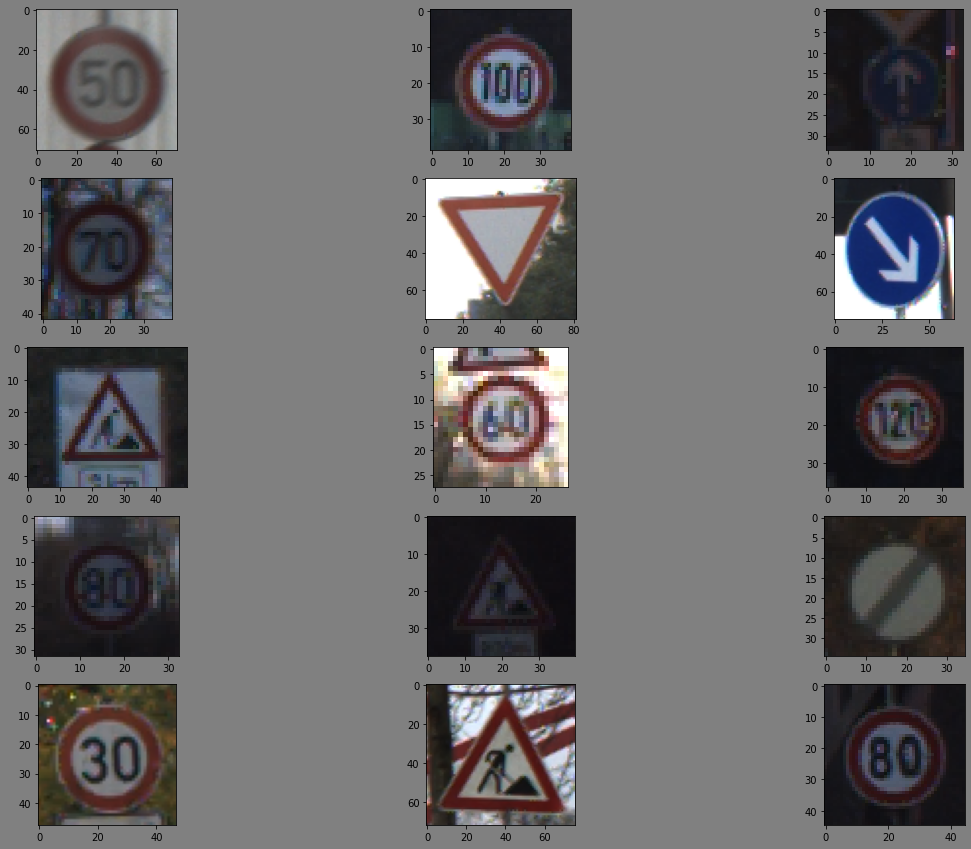

In [7]:
figure, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 15))
for i in range(15):
    path = np.random.choice(files)
    images = cv2.imread(path)
    images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
    axes[i//3, i%3].imshow(images)
figure.set_facecolor("grey")
plt.show()

### Checking count of each class

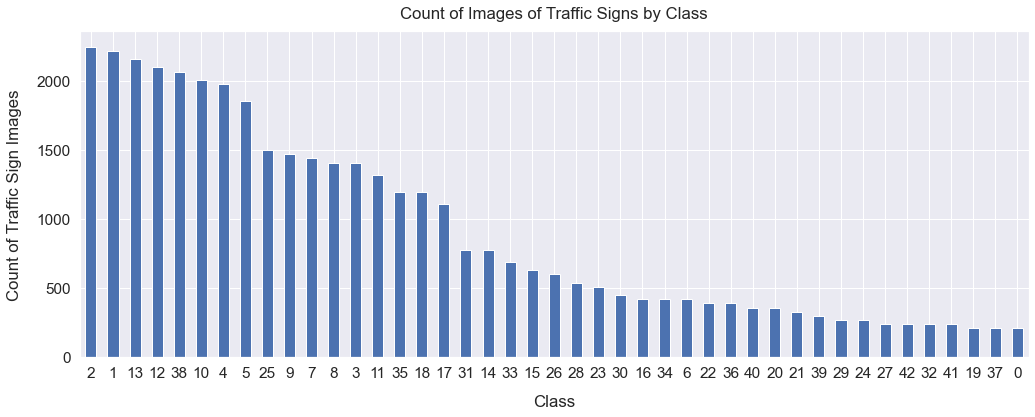

In [8]:
sns.set(font_scale = 1.4)
train_df['ClassId'].value_counts().plot(kind = 'bar', figsize = (17, 6), rot = 0)
plt.xlabel("Class", labelpad = 14)
plt.ylabel("Count of Traffic Sign Images", labelpad = 14)
plt.title("Count of Images of Traffic Signs by Class", y = 1.02)
plt.show()

`Class 2` has the highest number of images while `Classes 19, 37, and 0` has the lowest number of images.

### Visualization of Images based on Class

In [9]:
def visualize_train_batch(paths, categories):
    plt.figure(figsize = (16, 16))
    for ind, info in enumerate(zip(paths, categories)):
        path, category = info
        plt.subplot(2, 3, ind + 1)
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(f"Category: {category}", fontsize = 20, color = 'k')
        plt.axis("off")
    plt.show()

In [10]:
def visualize_by_id(df, _id = None):
    if _id is not None:
        cat = df[df["ClassId"] == _id].sample(3)
    visualize_train_batch(cat["Path"], cat["ClassId"])

#### Images for Class 10

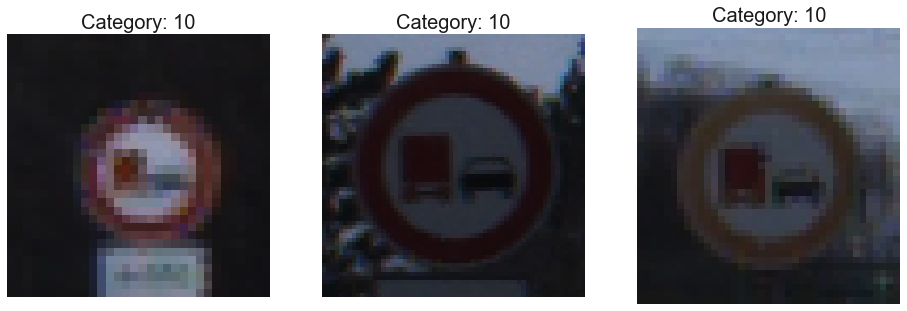

In [11]:
visualize_by_id(train_df, 10)

#### Images for Class 2

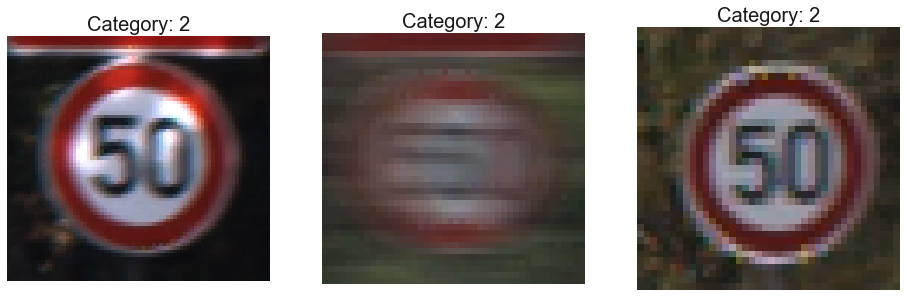

In [12]:
visualize_by_id(train_df, 2)

#### Images for Class 35

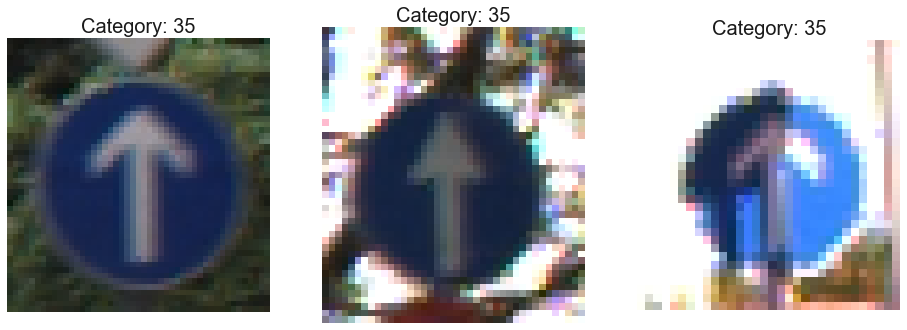

In [13]:
visualize_by_id(train_df, 35)

 #### Images for Class 35

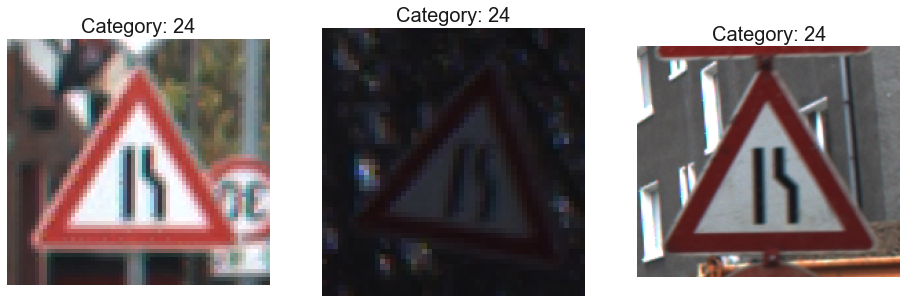

In [14]:
visualize_by_id(train_df, 24)

## Data Splitting into Train and Validation Set

### Loading Input Images

In [15]:
train_image = []
for i in tqdm(range(train_df.shape[0])):
    img = image.load_img(train_df['Path'][i], target_size = (28, 28, 3))
    img = image.img_to_array(img)
    img = img / 255
    train_image.append(img)
X = np.array(train_image)                                  

100%|███████████████████████████████████████████████████████████████████████████| 39209/39209 [00:59<00:00, 662.16it/s]


### Target

In [16]:
y = train_df['ClassId'].values
y = to_categorical(y)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 42, test_size = 0.2)

## Keras Model

### Importing necessary libraries required for creating model

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

### Model Creation

In [19]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(43, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 43)                5547      
Total params: 1,204,715
Trainable params: 1,204,715
Non-trainable params: 0
______________________________________________

### Compiling the Model

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

### Training the Network Model

In [21]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10
981/981 [==============================] - 5s 5ms/step - loss: 0.6974 - accuracy: 0.8134 - val_loss: 0.1877 - val_accuracy: 0.9478
Epoch 2/10
981/981 [==============================] - 5s 5ms/step - loss: 0.1097 - accuracy: 0.9697 - val_loss: 0.1253 - val_accuracy: 0.9660
Epoch 3/10
981/981 [==============================] - 5s 5ms/step - loss: 0.0554 - accuracy: 0.9848 - val_loss: 0.0827 - val_accuracy: 0.9793
Epoch 4/10
981/981 [==============================] - 5s 5ms/step - loss: 0.0383 - accuracy: 0.9895 - val_loss: 0.1029 - val_accuracy: 0.9727
Epoch 5/10
981/981 [==============================] - 6s 6ms/step - loss: 0.0256 - accuracy: 0.9928 - val_loss: 0.0560 - val_accuracy: 0.9861
Epoch 6/10
981/981 [==============================] - 6s 6ms/step - loss: 0.0225 - accuracy: 0.9938 - val_loss: 0.0627 - val_accuracy: 0.9839
Epoch 7/10
981/981 [==============================] - 5s 5ms/step - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.0589 - val_accuracy: 0.9866
Epoch 

### Visualizing Accuracy and Loss

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(acc) + 1)

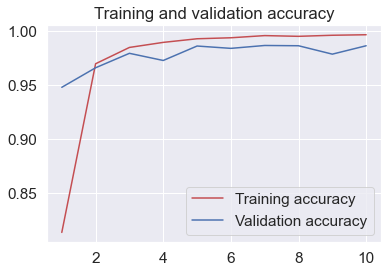

In [23]:
## Accuracy 
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

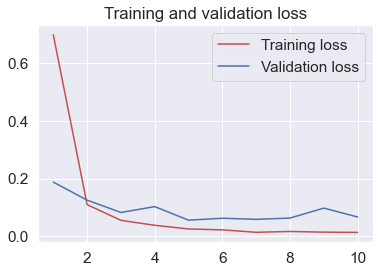

In [24]:
## Loss
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Test Dataset

In [25]:
test_df = pd.read_csv('Test.csv')

In [26]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [27]:
test_image = []
for i in tqdm(range(test_df.shape[0])):
    img = image.load_img(test_df['Path'][i], target_size=(28,28,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X_test = np.array(test_image)

100%|███████████████████████████████████████████████████████████████████████████| 12630/12630 [00:21<00:00, 599.34it/s]


In [28]:
y_test = test_df['ClassId'].values
y_test = to_categorical(y_test)

### Testing on test dataset

In [29]:
model.fit(X, y, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1226/1226 [==============================] - 7s 5ms/step - loss: 0.0229 - accuracy: 0.9944 - val_loss: 0.3019 - val_accuracy: 0.9359
Epoch 2/10
1226/1226 [==============================] - 6s 5ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.2905 - val_accuracy: 0.9428
Epoch 3/10
1226/1226 [==============================] - 6s 5ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.3418 - val_accuracy: 0.9456
Epoch 4/10
1226/1226 [==============================] - 7s 5ms/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.2644 - val_accuracy: 0.9519
Epoch 5/10
1226/1226 [==============================] - 7s 5ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.3400 - val_accuracy: 0.9344
Epoch 6/10
1226/1226 [==============================] - 7s 5ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.3799 - val_accuracy: 0.9474
Epoch 7/10
1226/1226 [==============================] - 7s 5ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.3149 - val_accuracy:

### Making Predictions

In [30]:
prediction = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


### Creating Prediction File

In [31]:
pred_df = pd.DataFrame()
pred_df["Img_Path"] = test_df['Path']
pred_df["Prediction"] = prediction
pred_df.head()

,Img_Path,Prediction
0,Test/00000.png,16
1,Test/00001.png,1
2,Test/00002.png,38
3,Test/00003.png,33
4,Test/00004.png,11


The actual class is : 4
The predicted class is : 4


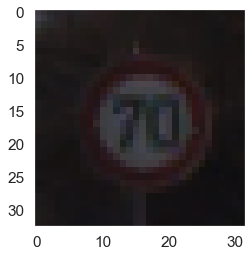

In [32]:
img_num = 20
img = plt.imread(test_df["Path"][img_num])
plt.grid(False)
plt.imshow(img)
print("The actual class is :", test_df["ClassId"][img_num])
print("The predicted class is :", pred_df["Prediction"][20])

The actual class is : 17
The predicted class is : 17


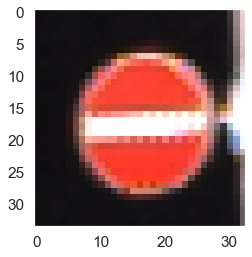

In [34]:
img_num = 35
img = plt.imread(test_df["Path"][img_num])
plt.grid(False)
plt.imshow(img)
print("The actual class is :", test_df["ClassId"][img_num])
print("The predicted class is :", pred_df["Prediction"][35])

The actual class is : 30
The predicted class is : 30


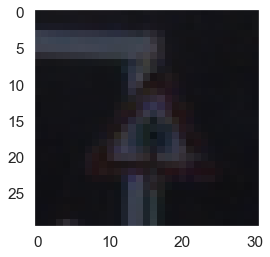

In [36]:
img_num = 72
img = plt.imread(test_df["Path"][img_num])
plt.grid(False)
plt.imshow(img)
print("The actual class is :", test_df["ClassId"][img_num])
print("The predicted class is :", pred_df["Prediction"][72])